#  Chapter 52: Nearest-Neighbor Rule

### This code generates figures 2 and 3 in Chapter 52: Nearest-Neighbor Rule (vol. III)
    

TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs.  The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Saba Nasiri. 

required libraries:
    
1. numpy
2. matplotlib.pyplot
3. scipy.spatial
4. scipy.io
5. csv
6. pandas
7. matplotlib.pyplot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import scipy.io
import csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d


## Multiclass classification: 5-NN rule

Figure 52.2 illustrates the separating regions in the plane that would result for $k=5$ neighbors and $R=3$ classes. The training data is represented by the colored circles (green for  $r=1$, red for $r=2$, and yellow for $r=3$). The colored regions represent the class that would be assigned to any feature vector falling into the region. For example, if a location in the plane is colored in red, the color indicates that the majority of the five neighbors to this location will belong to class $r=2$. Therefore, any feature $h$  falling into the red region will be assigned to class $r=2$, and similarly for the two other colored regions. This figure was generated using a total of $N=150$ random training points within the region $[0,1]\times[0,1]$.


In [2]:
N = 150 # number of points
K = 5 # number of neighbors
x = np.random.rand(N)
y = np.random.rand(N)

gamma = []
xtg = np.zeros((N,))
ytg = np.zeros((N,))
xtr = np.zeros((N,))
ytr = np.zeros((N,))
xty = np.zeros((N,))
yty = np.zeros((N,))

for m in range(N): # assigning classes 1, 2 or 3 to these 100 points
    a = np.random.rand(1)[0]
    if a < 1/3:
        gamma.append(1)
        xtg[m] = x[m]
        ytg[m] = y[m]
    else:
        if a>=1/3 and a<2/3:
            gamma.append(2)
            xtr[m] = x[m]
            ytr[m] = y[m]
        else:
            if a>= 2/3:
                gamma.append(3)
                xty[m] = x[m]
                yty[m] = y[m]
    
ix = 0
iy = 0

d2 = np.zeros((N,))
classes = np.zeros((len(np.arange(0, 1.005, 0.005)), len(np.arange(0, 1.005, 0.005))))
xg = np.zeros((len(np.arange(0, 1.005, 0.005)), len(np.arange(0, 1.005, 0.005))))
xr = np.zeros((len(np.arange(0, 1.005, 0.005)), len(np.arange(0, 1.005, 0.005))))
xye = np.zeros((len(np.arange(0, 1.005, 0.005)), len(np.arange(0, 1.005, 0.005))))
yg = np.zeros((len(np.arange(0, 1.005, 0.005)), len(np.arange(0, 1.005, 0.005))))
yr = np.zeros((len(np.arange(0, 1.005, 0.005)), len(np.arange(0, 1.005, 0.005))))
yye = np.zeros((len(np.arange(0, 1.005, 0.005)), len(np.arange(0, 1.005, 0.005))))

for xx in np.arange(0, 1.005, 0.005): # comb the plane with a fine resolution
    for yy in np.arange(0, 1.005, 0.005):
        
        for m in range(N):
            d2[m] = (x[m]-xx)**2 + (y[m]-yy)**2 # squared distance
            
        idx = np.argsort(d2) # sort
        idx2 = idx[0:K] # index of K closest points
        GN = np.zeros((K,))
        XN = np.zeros((K,))
        YN = np.zeros((K,))
        for kk in range(K):
            XN = x[idx2] # x-coordinates of nearest K neighbors
            YN = y[idx2] # y-coordinates of nearest K neighbors
            GN = np.array(gamma)[idx2] # classes of nearest K-neighbors
            counter_1 = 0;
            counter_1 = 0
            counter_2 = 0
            counter_3 = 0
            
            for ss in range(K): # count how many of each class in the neighborhood
                if GN[ss] == 1:
                    counter_1 = counter_1 + 1
                    
                if GN[ss] == 2:
                    counter_2 = 2
                    
                if GN[ss] == 3:
                    counter_3 = counter_3 + 1
                        
            cc = []
            cc.append(counter_1)
            cc.append(counter_2)
            cc.append(counter_3)
        
            idc = cc.index(max(cc)) # idc is the index of the class with the most votes
            if idc == 0:
                classes[ix, iy] = 1 # majority is class 1
                xg[ix, iy] = xx # green point
                yg[ix, iy] = yy
        
            if idc == 1:
                classes[ix, iy] = 2 # majority is class 2
                xr[ix, iy] = xx # red point 
                yr[ix, iy] = yy
        
            if idc == 2:
                classes[ix, iy] = 3 # majority is class 3
                xye[ix, iy] = xx # yellow point 
                yye[ix, iy] = yy
              
        iy = iy + 1
        
    iy = 0
    ix = ix + 1
        

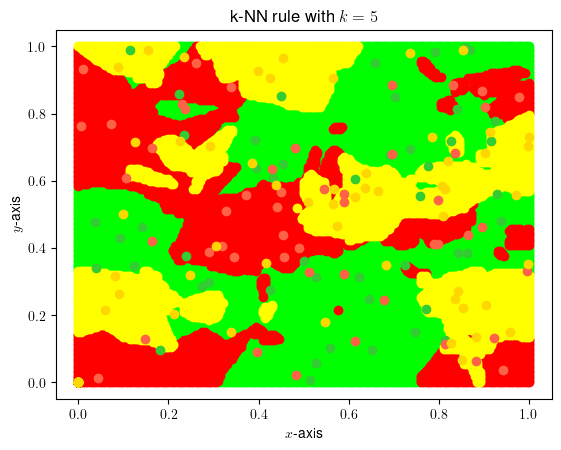

In [4]:
# figure 2 (5-NN plot)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.scatter(xg, yg, c='lime')
plt.scatter(xr, yr, c='r')
plt.scatter(xye, yye, c='yellow')
plt.xlabel(r"$x$-axis")
plt.ylabel(r"$y$-axis")
plt.title(r"k-NN rule with $k = 5$")
plt.scatter(xtg, ytg, c='limegreen')
plt.scatter(xtr, ytr, c='tomato')
plt.scatter(xty, yty, c='gold');

plt.savefig('figs/fig 52.2.pdf')

**Figure 52.2** The separation regions generated by applying a 5-NN rule over 150 randomly generated feature vectors $h_n\in R^2$ arising from three classes: green(class $r = 1$), red(class $r = 2$), and yellow(class $r = 3$).

## Voronoi diagram

In [5]:
N = 100 # number of points
x = np.random.rand(N)
y = np.random.rand(N)
xtr = np.zeros((N,))
ytr = np.zeros((N,))
xtg = np.zeros((N,))
ytg = np.zeros((N,))

gamma = np.zeros((N,))

for m in range(N): # assigning classes 1, 2 or 3 to these 100 points
    a = np.random.rand(1)[0]
    if a<= 1/2:
        gamma[m] = 1
        xtg[m] = x[m] # class +1 will be colored green
        ytg[m] = y[m]
    else:
        gamma[m] = -1 # class -1 will be colored red
        xtr[m] = x[m]
        ytr[m] = y[m]


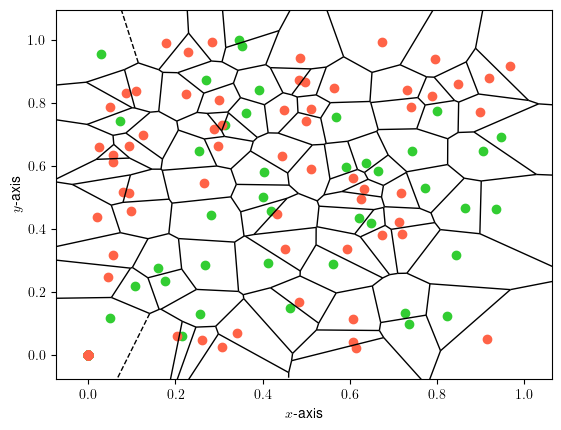

In [10]:
# figure 3 (Voronoi diagram)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

points = []
for i in range(N):
    points.append([x[i], y[i]])


fig,ax = plt.subplots(1,1)
vor = Voronoi(points)
voronoi_plot_2d(vor, ax, show_vertices=False, show_points=False)
ax.scatter(xtg, ytg, c='limegreen')
ax.scatter(xtr, ytr, c='tomato')
ax.set_xlabel(r"$x$-axis")
ax.set_ylabel(r"$y$-axis");

plt.savefig('figs/fig 52.3.pdf')

**Figure 52.3** Voronoi diagram for 100 randomly generated feature vectors $h_n \in R^2$. Points in green belong to class $+1$ while points in red belong to class $-1$.  

## Clustering

The two plots in the first row of  Fig. 52.4 show $N=250$ random feature vectors $h_n\in R^2$ belonging to five different classes; the classes are colored in the plot on the left in order to identify them to the reader. The $k-$means algorithm is blind to the class information and operates on the unlabeled data in the plot on the right. The three plots in the bottom row show the result of applying the $k-$means algorithm for each of the three initialization procedures (Forgy, random, and $k-$ means++). The location of the mean vector for each cluster is marked by a large $\times$ symbol. It is seen in this simulation that the location of the  mean vectors is largely unaffected by the type of the initialization. The plots in the bottom also show the Voronoi diagrams (separation regions) that result from using the mean vectors.  

In [2]:
N = 250  # number of points
K = 5  # number of clusters 
x = np.random.rand(N)
y = np.random.rand(N)
M = 2
Hx = np.zeros((M, N))
Gx = np.zeros((N,))

J = 20 # how many times to iterate k-means algorithm

# Generate clustered data
xtg = 0.25 * np.random.rand(int(N/5)) + 0.05
ytg = 0.35 * np.random.rand(int(N/5)) + 0.6
a = []
a.append(xtg.T)
a.append(ytg.T)
a = np.array(a)
Hx[0][0:int(N/5)] = a[0] 
Hx[1][0:int(N/5)] = a[1] 
Gx[0:int(N/5)] = 1


xtr = 0.25 * np.random.rand(int(N/5)) + 0.75
ytr = 0.3 * np.random.rand(int(N/5)) + 0.3
a = []
a.append(xtr.T)
a.append(ytr.T)
a = np.array(a)
Hx[0][int(N/5):2*int(N/5)] =a[0] 
Hx[1][int(N/5):2*int(N/5)] =a[1] 
Gx[int(N/5):2*int(N/5)] = 2


xty = 0.3 * np.random.rand(int(N/5)) + 0.4
yty = 0.3 * np.random.rand(int(N/5)) + 0.1
a = []
a.append(xty.T)
a.append(yty.T)
a = np.array(a)
Hx[0][2*int(N/5):3*int(N/5)] =a[0] 
Hx[1][2*int(N/5):3*int(N/5)] =a[1] 
Gx[2*int(N/5):3*int(N/5)] = 3


xtm = 0.3 * np.random.rand(int(N/5)) + 0.4
ytm = 0.3 * np.random.rand(int(N/5)) + 0.6
a = []
a.append(xtm.T)
a.append(ytm.T)
a = np.array(a)
Hx[0][3*int(N/5):4*int(N/5)] =a[0] 
Hx[1][3*int(N/5):4*int(N/5)] =a[1] 
Gx[3*int(N/5):4*int(N/5)] = 4


xtb = 0.25 * np.random.rand(int(N/5)) + 0.05
ytb = 0.4 * np.random.rand(int(N/5)) + 0.05
a = []
a.append(xtb.T)
a.append(ytb.T)
a = np.array(a)
Hx[0][4*int(N/5):N] =a[0] 
Hx[1][4*int(N/5):N] =a[1] 
Gx[4*int(N/5):N] = 5

H = np.zeros((M, N))
G = np.zeros((N,))
P = np.random.permutation(N)
for n in range(N):
    H[0][n] = Hx[0][P[n]]
    H[1][n] = Hx[1][P[n]]
    G[n] = Gx[P[n]]

In [3]:
# Forgy intialization

idx = np.random.randint(0,N,K) # pick randomly K indices
mean1 = np.zeros((M, K))
for k in range(K):
    mean1[0][k] = H[0][idx[k]]
    mean1[1][k] = H[1][idx[k]]

# Run clustering
cluster = np.zeros((N,)) # cluster information for each h_n
size_cluster = np.zeros((K,))

for j in range(J):
    for n in range(N):
        h = H[:, n]
        d = np.zeros((K,))
        for k in range(K):
            mu = mean1[:,k]
            d[k] = (h[0]-mu[0])**2 + (h[1]-mu[1])**2
        
        idx = np.argsort(d) # sort
        cluster[n] = idx[0]
        
    for k in range(K):
        summ = 0
        size_cluster = np.zeros((K,))
        for n in range(N):
            if cluster[n] == k:
                summ = summ + H[:, n]
                size_cluster[k] = size_cluster[k] + 1
        
        if size_cluster[k] != 0:
            mean1[:, k] = summ/size_cluster[k]

            
            
# coloring the clusters
m1 = 0
m2 = 0
m3 = 0
m4 = 0
m5 = 0
xcg = []
ycg = []
xcr = []
ycr = []
xcy = []
ycy = []
xcm = []
ycm = []
xcb = []
ycb = []

for m in range(N):
    if cluster[m]+1 == 1:
        xcg.append(H[0][m]) # class 1 will be colored green
        ycg.append(H[1][m])
        m1 = m1 + 1
        
    if cluster[m]+1 == 2:
        xcr.append(H[0][m]) # red
        ycr.append(H[1][m])
        m2 = m2 + 1

    if cluster[m]+1 == 3:
        xcy.append(H[0][m]) # green
        ycy.append(H[1][m])
        m3 = m3 + 1

    if cluster[m]+1 == 4:
        xcm.append(H[0][m]) # magenta
        ycm.append(H[1][m])
        m4 = m4 + 1

    if cluster[m]+1 == 5:
        xcb.append(H[0][m]) # blue
        ycb.append(H[1][m])
        m5 = m5 + 1
    

In [4]:
# Random partitioning initialization

cluster_x = np.random.randint(0, K, N) # assigning feature vectors to random clusters
cluster_size_x = np.zeros((K, ))
mean2 = np.zeros((M, K))
for k in range(K):
    for n in range(N):
        if cluster_x[n] == k:
            mean2[:, k] = mean2[:, k] + H[:, n]
            cluster_size_x[k] = cluster_size_x[k] + 1
    if cluster_size_x[k] != 0:
        mean2[:, k] = mean2[:, k]/cluster_size_x[k]
    else:
        mean2[:, k] = H[:, np.random.randint(N)]

        
# Run clustering
cluster = np.zeros((N,))
size_cluster = np.zeros((K, ))

for j in range(J):
    for n in range(N):
        h = H[:, n]
        d = np.zeros((K,))
        for k in range(K):
            mu = mean2[:,k]
            d[k] = (h[0]-mu[0])**2 + (h[1]-mu[1])**2
        
        idx = np.argsort(d)
        cluster[n] = idx[0]
        
    for k in range(K):
        summ = 0
        size_cluster = np.zeros((K,))
        for n in range(N):
            if cluster[n] == k:
                summ = summ + H[:, n]
                size_cluster[k] = size_cluster[k] + 1
        
        if size_cluster[k] != 0:
            mean2[:, k] = summ/size_cluster[k]

            
# coloring the clusters    
m1 = 0
m2 = 0
m3 = 0
m4 = 0
m5 = 0
xcg2 = []
ycg2 = []
xcr2 = []
ycr2 = []
xcy2 = []
ycy2 = []
xcm2 = []
ycm2 = []
xcb2 = []
ycb2 = []

for m in range(N):
    if cluster[m]+1 == 1:
        xcg2.append(H[0][m]) # class 1 will be colored green
        ycg2.append(H[1][m])
        m1 = m1 + 1
        
    if cluster[m]+1 == 2:
        xcr2.append(H[0][m]) # red
        ycr2.append(H[1][m])
        m2 = m2 + 1

    if cluster[m]+1 == 3:
        xcy2.append(H[0][m]) # green
        ycy2.append(H[1][m])
        m3 = m3 + 1

    if cluster[m]+1 == 4:
        xcm2.append(H[0][m]) # magenta
        ycm2.append(H[1][m])
        m4 = m4 + 1

    if cluster[m]+1 == 5:
        xcb2.append(H[0][m]) # blue
        ycb2.append(H[1][m])
        m5 = m5 + 1


    

In [5]:
# k-means++ initialization

mean3 = np.zeros((M, K))
mean3[:, 0] = H[:, np.random.randint(N)] # pick first mean randomly
prob = np.zeros((N,))

for KK in range(K-1):
    for n in range(N):
        h = H[:, n]
        d = np.zeros((KK+1,))
        for k in range(KK+1):
            mu = mean3[:,k]
            d[k] = (h[0]-mu[0])**2 + (h[1]-mu[1])**2
        d2s = np.sort(d)
        prob[n] = d2s[0]
        
    sump = 0
    for n in range(N):
        sump = sump + prob[n]
        
    prob = prob/sump
    a = np.random.rand(1)[0]
    b = a >= np.cumsum(prob)
    xx = []
    for i in range(len(b)):
        if b[i] == True:
            xx.append(1)
        else:
            xx.append(0)
    
    xx = np.array(xx)
    L = max(xx.shape)
    sum_x = 0
    for ll in range(L):
        sum_x = sum_x + xx[ll]
        
    ind = sum_x
    if ind > N:
        ind = N
        
    KK = KK + 1


    
# Run clustering
cluster = np.zeros((N,))
size_cluster = np.zeros((K, ))

for j in range(J):
    for n in range(N):
        h = H[:, n]
        d = np.zeros((K,))
        for k in range(K):
            mu = mean3[:,k]
            d[k] = (h[0]-mu[0])**2 + (h[1]-mu[1])**2
        
        idx = np.argsort(d)
        cluster[n] = idx[0]
        
    for k in range(K):
        summ = 0
        size_cluster = np.zeros((K,))
        for n in range(N):
            if cluster[n] == k:
                summ = summ + H[:, n]
                size_cluster[k] = size_cluster[k] + 1
        
        if size_cluster[k] != 0:
            mean3[:, k] = summ/size_cluster[k]
    

m1 = 0
m2 = 0
m3 = 0
m4 = 0
m5 = 0
xcg3 = []
ycg3 = []
xcr3 = []
ycr3 = []
xcy3 = []
ycy3 = []
xcm3 = []
ycm3 = []
xcb3 = []
ycb3 = []
# coloring the clusters
for m in range(N):
    if cluster[m]+1 == 1:
        xcg3.append(H[0][m]) # class 1 will be colored green
        ycg3.append(H[1][m])
        m1 = m1 + 1
        
    if cluster[m]+1 == 2:
        xcr3.append(H[0][m]) # red
        ycr3.append(H[1][m])
        m2 = m2 + 1

    if cluster[m]+1 == 3:
        xcy3.append(H[0][m]) # green
        ycy3.append(H[1][m])
        m3 = m3 + 1

    if cluster[m]+1 == 4:
        xcm3.append(H[0][m]) # magenta
        ycm3.append(H[1][m])
        m4 = m4 + 1

    if cluster[m]+1 == 5:
        xcb3.append(H[0][m]) # blue
        ycb3.append(H[1][m])
        m5 = m5 + 1


    

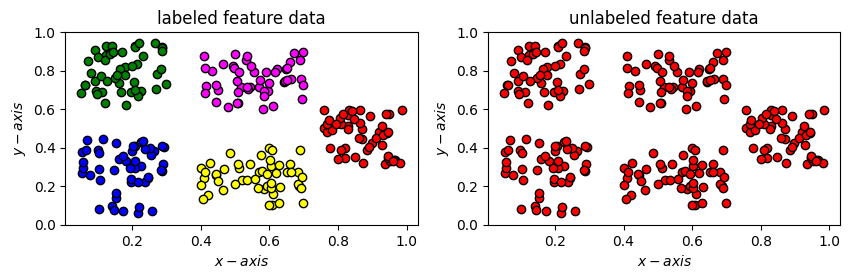

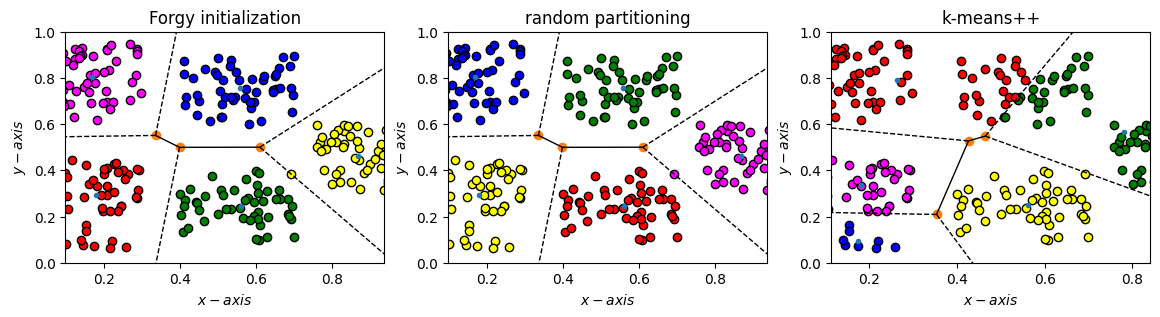

In [6]:
f1, axs1 =  plt.subplots(1, 2, figsize=(10,2.5))
axs1[0].scatter(xtg, ytg, c = 'green', edgecolors='black')
axs1[0].scatter(xtr, ytr, c = 'red', edgecolors='black')
axs1[0].scatter(xty, yty, c = 'yellow', edgecolors='black')
axs1[0].scatter(xtm, ytm, c = 'fuchsia', edgecolors='black')
axs1[0].scatter(xtb, ytb, c = 'blue', edgecolors='black')
axs1[0].set_ylabel(r'$y-axis$')
axs1[0].set_xlabel(r'$x-axis$')
axs1[0].set_title('labeled feature data');
axs1[0].set_ylim(0, 1)

# same color for all points
axs1[1].scatter(xtg, ytg, c = 'r', edgecolors='black')
axs1[1].scatter(xtr, ytr, c = 'r', edgecolors='black')
axs1[1].scatter(xty, yty, c = 'r', edgecolors='black')
axs1[1].scatter(xtm, ytm, c = 'r', edgecolors='black')
axs1[1].scatter(xtb, ytb, c = 'r', edgecolors='black')
axs1[1].set_ylabel(r'$y-axis$')
axs1[1].set_xlabel(r'$x-axis$')
axs1[1].set_title('unlabeled feature data');
axs1[1].set_ylim(0, 1)


f2, axs2 =  plt.subplots(1, 3, figsize=(14,3))

x = mean1[0, :]
y = mean1[1, :]
points = []

for i in range(len(x)):
    points.append([x[i], y[i]])

vor = Voronoi(points)
voronoi_plot_2d(vor, axs2[0])

axs2[0].scatter(xcg, ycg, c = 'green', edgecolors='black')
axs2[0].scatter(xcr, ycr, c = 'red', edgecolors='black')
axs2[0].scatter(xcy, ycy, c = 'yellow', edgecolors='black')
axs2[0].scatter(xcm, ycm, c = 'fuchsia', edgecolors='black')
axs2[0].scatter(xcb, ycb, c = 'blue', edgecolors='black')
axs2[0].set_ylabel(r'$y-axis$')
axs2[0].set_xlabel(r'$x-axis$')
axs2[0].set_title('Forgy initialization');
axs2[0].set_ylim(0, 1)


x = mean2[0, :]
y = mean2[1, :]
points = []

for i in range(len(x)):
    points.append([x[i], y[i]])

vor = Voronoi(points)
voronoi_plot_2d(vor, axs2[1])

axs2[1].scatter(xcg2, ycg2, c = 'green', edgecolors='black')
axs2[1].scatter(xcr2, ycr2, c = 'red', edgecolors='black')
axs2[1].scatter(xcy2, ycy2, c = 'yellow', edgecolors='black')
axs2[1].scatter(xcm2, ycm2, c = 'fuchsia', edgecolors='black')
axs2[1].scatter(xcb2, ycb2, c = 'blue', edgecolors='black')
axs2[1].set_ylabel(r'$y-axis$')
axs2[1].set_xlabel(r'$x-axis$')
axs2[1].set_title('random partitioning');
axs2[1].set_ylim(0, 1)


x = mean3[0, :]
y = mean3[1, :]
points = []

for i in range(len(x)):
    points.append([x[i], y[i]])

vor = Voronoi(points)
voronoi_plot_2d(vor, axs2[2])

axs2[2].scatter(xcg3, ycg3, c = 'green', edgecolors='black')
axs2[2].scatter(xcr3, ycr3, c = 'red', edgecolors='black')
axs2[2].scatter(xcy3, ycy3, c = 'yellow', edgecolors='black')
axs2[2].scatter(xcm3, ycm3, c = 'fuchsia', edgecolors='black')
axs2[2].scatter(xcb3, ycb3, c = 'blue', edgecolors='black')
axs2[2].set_ylabel(r'$y-axis$')
axs2[2].set_xlabel(r'$x-axis$')
axs2[2].set_title('k-means++');
axs2[2].set_ylim(0, 1);

#plt.savefig('fig 52.4.pdf')

**Figure 52.4** The plots in the top row show $N = 250$ feature vectors $h_n \in R^2$ belonging to five different classes; in the plot on the left, the classes are colored. The plots in the bottom row show the result of applying $k-$means clustering to the data usingthe three initialization methods, Forgy, random, and $k-$ means++. In this case, all methodsperform similarly. The $\times$ (blue point) marks show the location of the mean vectors for the clusters. 

## Classification

Figure 52.5 illustrates a second situation where the Voronoi regions are sensitive to the initialization procedure. The figure shows the result of applying the same $k-$ means clustering algorithm to a second collection of $N=250$ randomly generated feature vectors in the square region $[0,1]\times[0,1]$.

In [7]:
N = 250 # number of points
K = 5 # number of clusters
x = np.random.rand(N)
y = np.random.rand(N)
M = 2
Hx = np.zeros((M, N))
Gx = np.zeros((N,))

J = 20 # how many times to iterate k-means algorithm

n = 0
m1 = 0
m2 = 0
m3 = 0
m4 = 0
m5 = 0

gamma = np.zeros((N,))
xtg = []
ytg = []
xtr = []
ytr = []
xty = []
yty = []
xtm = []
ytm = []
xtb = []
ytb = []

for m in range(N): # assigning classes 1, 2 or 3 or 5 to these points
    a = np.random.rand()
    if a < 1/5:
        gamma[m] = 1
        xtg.append(x[m]) # class 1 will be colored green
        ytg.append(y[m])
        Hx[0][n] = x[m] 
        Hx[1][n] = y[m]
        Gx[n] = gamma[m]
        n = n+1
        m1 = m1+1
    else:
        if a >= 1/5 and a < 2/5:
            gamma[m] = 2
            xtr.append(x[m]) # class 2 will be colored red
            ytr.append(y[m])
            Hx[0][n] = x[m] 
            Hx[1][n] = y[m]
            Gx[n] = gamma[m]
            n = n+1
            m2 = m2+1
            
        else:
            if a >= 2/5 and a< 3/5:
                gamma[m] = 3
                xty.append(x[m]) # class 3 will be colored yellow
                yty.append(y[m])
                Hx[0][n] = x[m] 
                Hx[1][n] = y[m]
                Gx[n] = gamma[m]
                n = n+1
                m3 = m3+1
                
            else:
                if a >= 3/5 and a < 4/5:
                    gamma[m] = 4
                    xtm.append(x[m]) # class 4 will be colored magenta
                    ytm.append(y[m])
                    Hx[0][n] = x[m] 
                    Hx[1][n] = y[m]
                    Gx[n] = gamma[m]
                    n = n+1
                    m4 = m4+1
                    
                else:
                    if a >= 4/5:
                        gamma[m] = 5
                        xtb.append(x[m]) # class 3 will be colored blue
                        ytb.append(y[m])
                        Hx[0][n] = x[m] 
                        Hx[1][n] = y[m]
                        Gx[n] = gamma[m]
                        n = n+1
                        m5 = m5+1

            
        

        
H = np.zeros((M, N))
G = np.zeros((N,))
P = np.random.permutation(N)

for n in range(N):
    H[:, n] = Hx[:, P[n]]
    G[n] = Gx[P[n]]

In [9]:
# Forgy intialization

idx = np.random.randint(0, N, K)
mean1 = np.zeros((M, K))

for k in range(K):
    mean1[:, k] = H[:, idx[k]]

# Run clustering
cluster = np.zeros((N,)) # cluster information for each h_n
size_cluster = np.zeros((K,))

for j in range(J):
    for n in range(N):
        h = H[:, n]
        d = np.zeros((K,))
        for k in range(K):
            mu = mean1[:, k]
            d[k] = (h[0]-mu[0])**2 + (h[1]-mu[1])**2
            
        idx = np.argsort(d)
        cluster[n] = idx[0]
        
    
    for k in range(K):
        summ = 0
        size_cluster = np.zeros((K,))
        for n in range(N):
            if cluster[n] == k:
                summ = summ + H[:, n]
                size_cluster[k] = size_cluster[k] + 1
                
        if size_cluster[k] != 0:
            mean1[:, k] = summ/size_cluster[k]

# coloring the clusters
            
m1 = 0
m2 = 0
m3 = 0
m4 = 0
m5 = 0

xcg = []
ycg = []
xcr = []
ycr = []
xcy = []
ycy = []
xcm = []
ycm = []
xcb = []
ycb = []

for m in range(N):
    if cluster[m]+1 == 1:
        xcg.append(H[0, m]) # class 1 will be colored green
        ycg.append(H[1, m])
        m1 = m1 + 1
        
    if cluster[m]+1 == 2:
        xcr.append(H[0, m]) # red
        ycr.append(H[1, m])
        m2 = m2 + 1
        
    if cluster[m]+1 == 3:
        xcy.append(H[0, m]) #green
        ycy.append(H[1, m])
        m3 = m3 + 1
        
    if cluster[m]+1 == 4:
        xcm.append(H[0, m]) # magenta
        ycm.append(H[1, m])
        m4 = m4 + 1
        
    if cluster[m]+1 == 5:
        xcb.append(H[0, m]) # blue
        ycb.append(H[1, m])
        m5 = m5 + 1

In [10]:
# Random partitioning initialization

cluster_x = np.random.randint(0, K, N) # assigning feature vectors to random clusters

cluster_size_x = np.zeros((K,))
mean2 = np.zeros((M, K))

for k in range(K):
    for n in range(N):
        if cluster_x[n] == k:
            mean2[:, k] = mean2[:, k] + H[:, n]
            cluster_size_x[k] = cluster_size_x[k] + 1
            
    if cluster_size_x[k] != 0:
        mean2[:, k] = mean2[:, k]/cluster_size_x[k]
    else:
        mean2[:, k] = H[:, np.random.randint(N)]

        
# Run clustering        
cluster = np.zeros((N,))
size_cluster = np.zeros((K,))

for j in range(J):
    for n in range(N):
        h = H[:, n]
        d = np.zeros((K,))
        for k in range(K):
            mu = mean2[:, k]
            d[k] = (h[0]-mu[0])**2 + (h[1]-mu[1])**2 # squared distance
            
        idx = np.argsort(d) # sort
        cluster[n] = idx[0]
        
    for k in range(K):
        summ = 0
        size_cluster = np.zeros((K,))
        for n in range(N):
            if cluster[n] == k:
                summ = summ + H[:, n]
                size_cluster[k] = size_cluster[k] + 1
        if size_cluster[k] != 0:
            mean2[:, k] = summ/size_cluster[k]

            
            
# coloring the clusters

m1 = 0
m2 = 0
m3 = 0
m4 = 0
m5 = 0

xcg2 = []
ycg2 = []
xcr2 = []
ycr2 = []
xcy2 = []
ycy2 = []
xcm2 = []
ycm2 = []
xcb2 = []
ycb2 = []

for m in range(N):
    if cluster[m]+1 == 1:
        xcg2.append(H[0, m]) # class 1 will be colored green
        ycg2.append(H[1, m])
        m1 = m1 + 1
        
    if cluster[m]+1 == 2:
        xcr2.append(H[0, m]) # red 
        ycr2.append(H[1, m])
        m2 = m2 + 1
        
    if cluster[m]+1 == 3:
        xcy2.append(H[0, m]) # green
        ycy2.append(H[1, m])
        m3 = m3 + 1
        
    if cluster[m]+1 == 4:
        xcm2.append(H[0, m]) # magenta
        ycm2.append(H[1, m])
        m4 = m4 + 1
        
    if cluster[m]+1 == 5:
        xcb2.append(H[0, m]) # blue
        ycb2.append(H[1, m])
        m5 = m5 + 1

In [11]:
# k-means++ initialization

mean3 = np.zeros((M, K))
mean3[:, 0] = H[:, np.random.randint(N)] # pick first mean randomly
prob = np.zeros((N,))

for KK in range(K-1):
    for n in range(N):
        h = H[:, n]
        d = np.zeros((KK+1,))
        for k in range(KK+1):
            mu = mean3[:, k]
            d[k] = (h[0]-mu[0])**2 + (h[1]-mu[1])**2 # squred distance
        
        d2s = np.sort(d) # sort 
        prob[n] = d2s[0]
        
    sump = 0
    for n in range(N):
        sump = sump + prob[n]
            
    prob = prob/sump
    
    a = np.random.rand(1)[0]
    b = a >= np.cumsum(prob)
    xx = []
    for i in range(len(b)):
        if b[i] == True:
            xx.append(1)
        else:
            xx.append(0)
    
    xx = np.array(xx)
    L = max(xx.shape)
    sum_x = 0
    for ll in range(L):
        sum_x = sum_x + xx[ll]
        
    ind = sum_x
    if ind > N:
        ind = N
        
    mean3[:,KK+1] = H[:, ind]

# Run clustering
cluster = np.zeros((N,)) # cluster information for each h_n
size_cluster = np.zeros((K,))

for j in range(J):
    for n in range(N):
        h = H[:, n]
        d = np.zeros((K,))
        for k in range(K):
            mu = mean3[:, k]
            d[k] = (h[0]-mu[0])**2 + (h[1]-mu[1])**2 # squared distance 
            
        idx = np.argsort(d) # sort
        cluster[n] = idx[0]
        
    for k in range(K):
        summ = 0
        size_cluster = np.zeros((K,))
        for n in range(N):
            if cluster[n] == k:
                summ = summ + H[:,n]
                size_cluster[k] = size_cluster[k] + 1
        
        if size_cluster[k] != 0:
            mean3[:, k] = summ/size_cluster[k]

                   

m1 = 0
m2 = 0
m3 = 0
m4 = 0
m5 = 0

# coloring the clusters

xcg3 = []
ycg3 = []
xcr3 = []
ycr3 = []
xcy3 = []
ycy3 = []
xcm3 = []
ycm3 = []
xcb3 = []
ycb3 = []


for m in range(N):
    if cluster[m]+1 == 1:
        xcg3.append(H[0, m]) # class 1 will be colored green
        ycg3.append(H[1, m])
        m1 = m1 + 1
    
    if cluster[m]+1 == 2:
        xcr3.append(H[0, m]) # red
        ycr3.append(H[1, m])
        m2 = m2 + 1
        
    if cluster[m]+1 == 3:
        xcy3.append(H[0, m]) # green
        ycy3.append(H[1, m])
        m3 = m3 + 1
        
    if cluster[m]+1 == 4:
        xcm3.append(H[0, m]) # magenta
        ycm3.append(H[1, m])
        m4 = m4 + 1
    
    if cluster[m]+1 == 5:
        xcb3.append(H[0, m]) # blue
        ycb3.append(H[1, m])
        m5 = m5 + 1

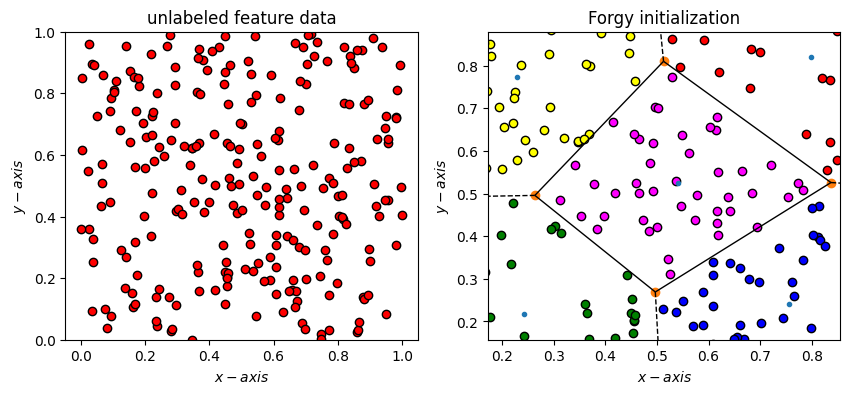

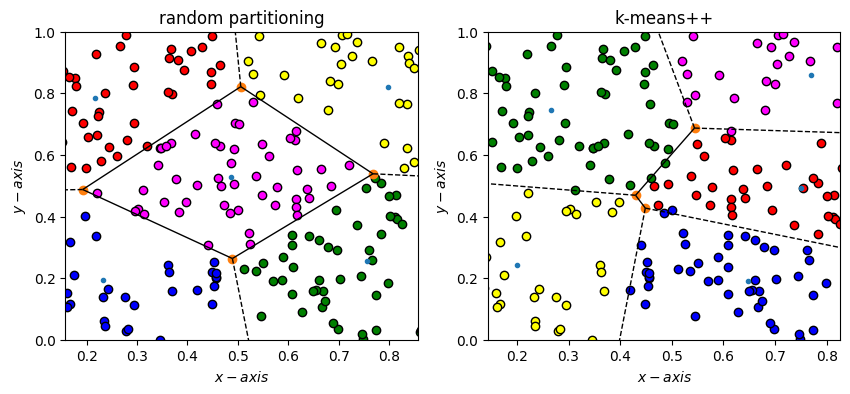

In [12]:
f1, axs1 =  plt.subplots(1, 2, figsize=(10,4));
axs1[0].scatter(xtg, ytg, c = 'red', edgecolors='black');
axs1[0].scatter(xtr, ytr, c = 'red', edgecolors='black');
axs1[0].scatter(xty, yty, c = 'red', edgecolors='black');
axs1[0].scatter(xtm, ytm, c = 'red', edgecolors='black');
axs1[0].scatter(xtb, ytb, c = 'red', edgecolors='black');
axs1[0].set_ylabel(r'$y-axis$');
axs1[0].set_xlabel(r'$x-axis$');
axs1[0].set_title('unlabeled feature data');
axs1[0].set_ylim(0, 1)


axs1[1].scatter(xcg, ycg, c = 'green', edgecolors='black')
axs1[1].scatter(xcr, ycr, c = 'red', edgecolors='black')
axs1[1].scatter(xcy, ycy, c = 'yellow', edgecolors='black')
axs1[1].scatter(xcm, ycm, c = 'fuchsia', edgecolors='black')
axs1[1].scatter(xcb, ycb, c = 'blue', edgecolors='black')
axs1[1].set_ylabel(r'$y-axis$')
axs1[1].set_xlabel(r'$x-axis$')
axs1[1].set_title('Forgy initialization');
axs1[1].set_ylim(0, 1)

x = mean1[0, :]
y = mean1[1, :]
points = []

for i in range(len(x)):
    points.append([x[i], y[i]])

vor = Voronoi(points)
voronoi_plot_2d(vor, axs1[1])

f2, axs2 =  plt.subplots(1, 2, figsize=(10,4))

x = mean2[0, :]
y = mean2[1, :]
points = []

for i in range(len(x)):
    points.append([x[i], y[i]])

vor = Voronoi(points)
voronoi_plot_2d(vor, axs2[0])

axs2[0].scatter(xcg2, ycg2, c = 'green', edgecolors='black')
axs2[0].scatter(xcr2, ycr2, c = 'red', edgecolors='black')
axs2[0].scatter(xcy2, ycy2, c = 'yellow', edgecolors='black')
axs2[0].scatter(xcm2, ycm2, c = 'fuchsia', edgecolors='black')
axs2[0].scatter(xcb2, ycb2, c = 'blue', edgecolors='black')
axs2[0].set_ylabel(r'$y-axis$')
axs2[0].set_xlabel(r'$x-axis$')
axs2[0].set_title('random partitioning');
axs2[0].set_ylim(0, 1)


x = mean3[0, :]
y = mean3[1, :]
points = []

for i in range(len(x)):
    points.append([x[i], y[i]])

vor = Voronoi(points)
voronoi_plot_2d(vor, axs2[1])

axs2[1].scatter(xcg3, ycg3, c = 'green', edgecolors='black')
axs2[1].scatter(xcr3, ycr3, c = 'red', edgecolors='black')
axs2[1].scatter(xcy3, ycy3, c = 'yellow', edgecolors='black')
axs2[1].scatter(xcm3, ycm3, c = 'fuchsia', edgecolors='black')
axs2[1].scatter(xcb3, ycb3, c = 'blue', edgecolors='black')
axs2[1].set_ylabel(r'$y-axis$')
axs2[1].set_xlabel(r'$x-axis$')
axs2[1].set_title('k-means++');
axs2[1].set_ylim(0, 1);

#plt.savefig('fig 52.5.pdf')

**Figure 52.5** The leftmost top plot shows $N = 250$ feature vectors $h_n \in R^2$ randomly generated in the square region $[0, 1] \times [0, 1]$. The other three plots show the result of applying $k-$means clustering on this data using the three initialization methods, Forgy, random, and $k-$ means++. In this case, the clustering results differ. The $\times$(blue point) symbol marks show the location of the mean vectors for the clusters.

## Example 52.3 (Clustering MNIST dataset)

We apply the $k-$ means clustering algorithm to the MNIST dataset. The classification results obtained here will not be as reliable as the ones we will obtain by using other more elaborate classification schemes in future chapters. The example here is only  meant to illustrate the operation of the clustering algorithm.
 
The MNIST dataset is useful for classifying handwritten digits. It contains 60,000 labeled training examples and 10,000 labeled test examples. Each entry in the dataset is a 28 $\times$ 28 grayscale image, which we transform into an 
$M=784-$long feature vector, $h_n$. Each pixel in the image and, therefore, each entry in $h_n$, assumes integer values in the range $[0,255]$. Every feature vector (or image) is assigned an integer label in the range $0$ to $9$ depending on which digit the image corresponds to. Figure 52.6 shows randomly selected images from the training dataset rendered using a copper-themed colormap.

In [13]:
mat = scipy.io.loadmat('./data/mnist.mat')

test_features = mat['testX'] # 10,000 rows x 784 columns; each row is a feature for one image
test_labels = mat['testY'][0] # 10,000 rows x 1   column; each row is the label 0-9
train_features = mat['trainX'] # 60,000 rows x 784 columns; each row is a training feature for one image
train_labels = mat['trainY'][0] # 60,000 rows x 1   column; each row is the label 0-9

N_train = max(train_features.shape)

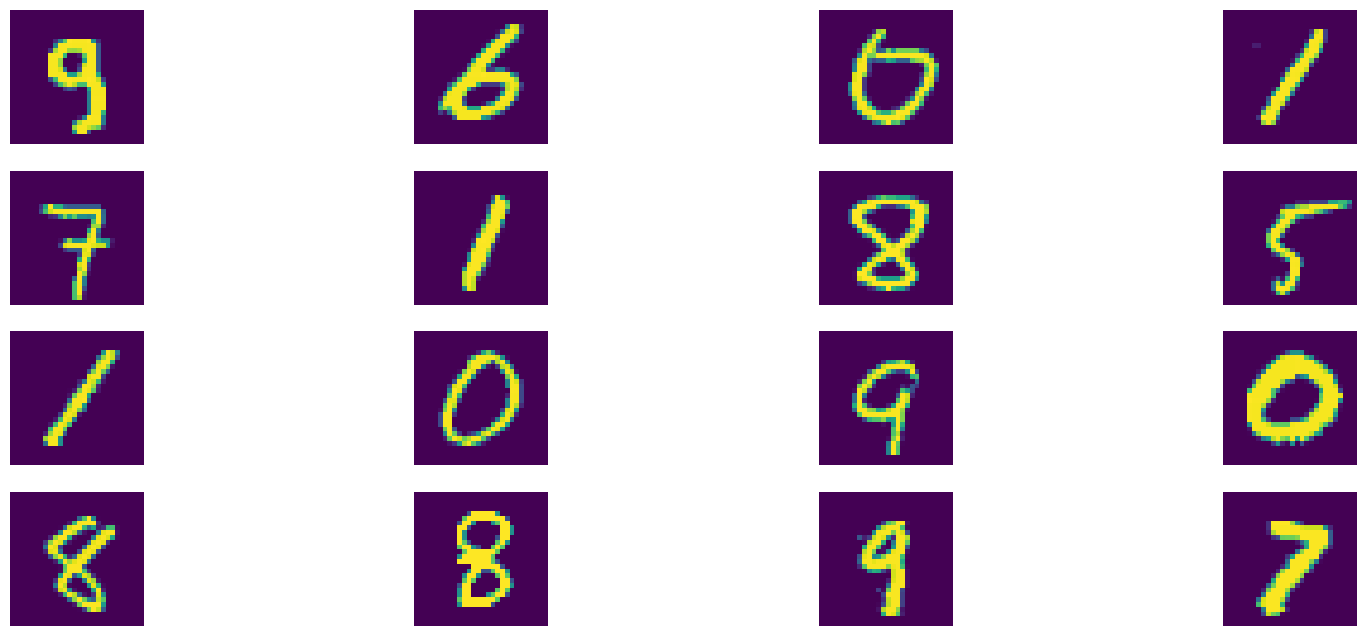

In [14]:
f1, axs1 = plt.subplots(4, 4, figsize=(20,8));

n = np.random.randint(N_train) # a random integer index
x = train_features[n, :] # random row or image 
gamma = train_labels[n] # its label
image_example = x.reshape(28, 28) # choose a row, reshape it into 28x28 image 
axs1[0][0].imshow(image_example, cmap=plt.cm.viridis);
axs1[0][0].axis('off');

n = np.random.randint(N_train)
x = train_features[n, :]
gamma = train_labels[n]
image_example = x.reshape(28, 28)
axs1[0][1].imshow(image_example, cmap=plt.cm.viridis);
axs1[0][1].axis('off');

n = np.random.randint(N_train)
x = train_features[n, :]
gamma = train_labels[n]
image_example = x.reshape(28, 28)
axs1[0][2].imshow(image_example, cmap=plt.cm.viridis);
axs1[0][2].axis('off');

n = np.random.randint(N_train)
x = train_features[n, :]
gamma = train_labels[n]
image_example = x.reshape(28, 28)
axs1[0][3].imshow(image_example, cmap=plt.cm.viridis);
axs1[0][3].axis('off');


n = np.random.randint(N_train)
x = train_features[n, :]
gamma = train_labels[n]
image_example = x.reshape(28, 28)
axs1[1][0].imshow(image_example, cmap=plt.cm.viridis);
axs1[1][0].axis('off');

n = np.random.randint(N_train)
x = train_features[n, :]
gamma = train_labels[n]
image_example = x.reshape(28, 28)
axs1[1][1].imshow(image_example, cmap=plt.cm.viridis);
axs1[1][1].axis('off');

n = np.random.randint(N_train)
x = train_features[n, :]
gamma = train_labels[n]
image_example = x.reshape(28, 28)
axs1[1][2].imshow(image_example, cmap=plt.cm.viridis);
axs1[1][2].axis('off');

n = np.random.randint(N_train)
x = train_features[n, :]
gamma = train_labels[n]
image_example = x.reshape(28, 28)
axs1[1][3].imshow(image_example, cmap=plt.cm.viridis);
axs1[1][3].axis('off');


n = np.random.randint(N_train)
x = train_features[n, :]
gamma = train_labels[n]
image_example = x.reshape(28, 28)
axs1[2][0].imshow(image_example, cmap=plt.cm.viridis);
axs1[2][0].axis('off');

n = np.random.randint(N_train)
x = train_features[n, :]
gamma = train_labels[n]
image_example = x.reshape(28, 28)
axs1[2][1].imshow(image_example, cmap=plt.cm.viridis);
axs1[2][1].axis('off');

n = np.random.randint(N_train)
x = train_features[n, :]
gamma = train_labels[n]
image_example = x.reshape(28, 28)
axs1[2][2].imshow(image_example, cmap=plt.cm.viridis);
axs1[2][2].axis('off');

n = np.random.randint(N_train)
x = train_features[n, :]
gamma = train_labels[n]
image_example = x.reshape(28, 28)
axs1[2][3].imshow(image_example, cmap=plt.cm.viridis);
axs1[2][3].axis('off');


n = np.random.randint(N_train)
x = train_features[n, :]
gamma = train_labels[n]
image_example = x.reshape(28, 28)
axs1[3][0].imshow(image_example, cmap=plt.cm.viridis);
axs1[3][0].axis('off');

n = np.random.randint(N_train)
x = train_features[n, :]
gamma = train_labels[n]
image_example = x.reshape(28, 28)
axs1[3][1].imshow(image_example, cmap=plt.cm.viridis);
axs1[3][1].axis('off');

n = np.random.randint(N_train)
x = train_features[n, :]
gamma = train_labels[n]
image_example = x.reshape(28, 28)
axs1[3][2].imshow(image_example, cmap=plt.cm.viridis);
axs1[3][2].axis('off');

n = np.random.randint(N_train)
x = train_features[n, :]
gamma = train_labels[n]
image_example = x.reshape(28, 28)
axs1[3][3].imshow(image_example, cmap=plt.cm.viridis);
axs1[3][3].axis('off');

#plt.savefig('fig 52.6.pdf')

**Figure 52.6** Randomly selected images from the MNIST dataset for handwritten digits. Each image is $28\times 28$ grayscale with pixels assuming integer values in the range $[0,255]$. The dataset can be downloaded from http://yann.lecun.com/exdb/mnist/ or https://github.com/daniel-e/mnist_octave.

We pre-process the images $\{h_n\}$ by scaling their entries by $255$ (so that they assume values in the range $[0,1]$). We subsequently compute the mean feature vectors for the training and test sets. We center the scaled feature vectors around their respective means in both sets. Figure 52.7 shows randomly selected images for the digits $0$ and $1$ before and after processing using the same colormap as before.

In [15]:
#  loading MNIST data for digits 0 and 1; all attributes have integer values in the range 0 to 255
mat = scipy.io.loadmat('./data/mnist_digits_01.mat')

train = mat['train_01'] # features for training on digits 0 and 1; each row has 784 entries
train_labels_01 = mat['train_lab_01'] # corresponding labels
test = mat['test_01'] # features for testing on digits 0 and 1; each row has 784 entries
test_labels_01 = mat['test_lab_01'] # corresponding labels

N_train = max(train.shape)
N_test = max(test.shape)

mat = scipy.io.loadmat('./data/mnist_normalized_digits_01.mat')

train_normalized = mat['train_norm_01'] # features for training on digits 0 and 1; each row has 784 entries
train_normalized_labels_01 = mat['train_norm_lab_01'].T[0] # corresponding labels
test_normalized = mat['test_norm_01'] # features for testing on digits 0 and 1; each row has 784 entries
train_normalized_labels_01 = mat['test_norm_lab_01'].T[0] # corresponding labels


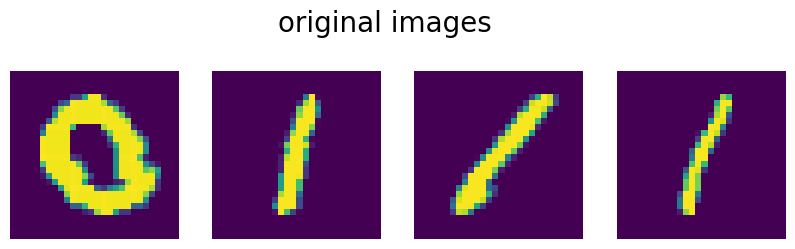

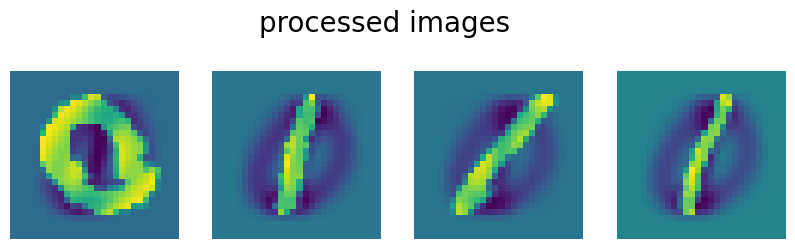

In [16]:
# comparing images before and after normalization

f1, axs1 = plt.subplots(1, 4, figsize=(10,3));
f1.suptitle("original images", fontsize = 20)

n1 = np.random.randint(N_train)
x1 = train[n1, :]
image_example = x1.reshape(28, 28)
axs1[0].imshow(image_example, cmap=plt.cm.viridis);
axs1[0].axis('off');

n2 = np.random.randint(N_train)
x2 = train[n2, :]
image_example = x2.reshape(28, 28)
axs1[1].imshow(image_example, cmap=plt.cm.viridis);
axs1[1].axis('off');

n3 = np.random.randint(N_train)
x3 = train[n3, :]
image_example = x3.reshape(28, 28)
axs1[2].imshow(image_example, cmap=plt.cm.viridis);
axs1[2].axis('off');

n4 = np.random.randint(N_train)
x4 = train[n4, :]
image_example = x4.reshape(28, 28)
axs1[3].imshow(image_example, cmap=plt.cm.viridis);
axs1[3].axis('off');


f1, axs1 = plt.subplots(1, 4, figsize=(10,3));
f1.suptitle("processed images", fontsize = 20)

x1 = train_normalized[n1, :]
image_example = x1.reshape(28, 28)
axs1[0].imshow(image_example, cmap=plt.cm.viridis);
axs1[0].axis('off');

x2 = train_normalized[n2, :]
image_example = x2.reshape(28, 28)
axs1[1].imshow(image_example, cmap=plt.cm.viridis);
axs1[1].axis('off');

x3 = train_normalized[n3, :]
image_example = x3.reshape(28, 28)
axs1[2].imshow(image_example, cmap=plt.cm.viridis);
axs1[2].axis('off');

x4 = train_normalized[n4, :]
image_example = x4.reshape(28, 28)
axs1[3].imshow(image_example, cmap=plt.cm.viridis);
axs1[3].axis('off');

#plt.savefig('fig 52.7.pdf')

**Figure 52.7** Randomly selected images for the digits $0$ and $1$ from the MNIST dataset for handwritten digits. The top row shows original images and the bottom row shows the processed images, whose pixels are scaled down to the interval $[0,1]$ and centered around the mean feature vectors for training and testing.

We apply the $k-$ means++ algorithm to identify $K=10$ clusters in the normalized training samples. We run the algorithm for $1000$ iterations. At the end of these iterations, we obtain the mean vectors (centroids) for each of the clusters and plot them in Fig. 52.8. The figure shows $K=10$ clusters labeled $k=1$ through $k=10$; note that the number we are assigning to refer to each cluster is different from the actual digit numbering from 0 to 9.  We further assign a class label to each cluster using a majority vote. The digit that is most repeated within a cluster determines its label. Table 52.1 lists some statistics about the clusters: It shows the number of images that end up in each cluster, and the number of times that the most frequent digit appeared within the cluster.  For example, a total of 9420 training images are assigned to cluster $1$ and 6593 of these images happen to correspond to digit $1$. This class label is assigned to the first cluster and it is written on top of the mean image corresponding to the cluster. Likewise, among the 8891 images in cluster 2, the most represented digit is 4 and it occurs 3180 times. We therefore assign the label 4 to cluster 2, and so forth. In the table, the first column lists the cluster number and the second column lists the class label that is assigned to the cluster. The last column shows the relative frequency of the most represented digit within each cluster.

**Table 52.1** The table lists the clusters, their assigned labels, the total number of images in each cluster, the number of occurrences of the most frequent digit in the cluster, and its relative frequency within that cluster.
<table style="width: 70%;">
</b></caption>
    <tr>
    <th>Cluster number</th>
    <th>Cluster label</th>
    <th>Total images</th>
    <th>Occurrences of most frequent digit</th>
    <th>Percentage</th>
  </tr>
  <tr>
    <th>1</th>
    <th>1</th>
    <th>9420</th>
    <th>6593</th>
    <th>70.0%</th>
   </tr>
  <tr>
    <th>2</th>
    <th>4</th>
    <th>8891</th>
    <th>3180</th>
    <th>35.85%</th>
   </tr>
  <tr>
    <th>3</th>
    <th>2</th>
    <th>4455</th>
    <th>4105</th>
    <th>92.1%</th>
   </tr>
  <tr>
    <th>4</th>
    <th>3</th>
    <th>5076</th>
    <th>2117</th>
    <th>41.7%</th>
   </tr>
  <tr>
    <th>5</th>
    <th>0</th>
    <th>4540</th>
    <th>4289</th>
    <th>94.5%</th>
   </tr>
  <tr>
    <th>6</th>
    <th>7</th>
    <th>8488</th>
    <th>3840</th>
    <th>45.2%</th>
   </tr>
  <tr>
    <th>7</th>
    <th>6</th>
    <th>5329</th>
    <th>1737</th>
    <th>32.6%</th>
   </tr>
  <tr>
    <th>8</th>
    <th>6</th>
    <th>4291</th>
    <th>3766</th>
    <th>87.8%</th>
   </tr>
  <tr>
    <th>9</th>
    <th>3</th>
    <th>4832</th>
    <th>2833</th>
    <th>58.6%</th>
   </tr>
  <tr>
    <th>10</th>
    <th>8</th>
    <th>4678</th>
    <th>3373</th>
    <th>72.1%</th>
   </tr>
</table>
  
Observe from Fig. 52.8 and also from the data in Table 52.1 that clusters 7 and 8 are labeled as corresponding to the same digit, $6$. There is no label corresponding to digit 5 in the figure and table. We can examine more closely the frequency of digit occurrences within each cluster, as shown in the following listing:

<table style="width: 70%;">
    <tr>
    <th></th>
    <th>0</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
    <th>6</th>
    <th>7</th>
    <th>8</th>
    <th>9</th>
  </tr>
  <tr>
    <th>1</th>
    <th>5</th>
    <th>6593</th>
    <th>676</th>
    <th>301</th>
    <th>220</th>
    <th>282</th>
    <th>173</th>
    <th>442</th>
    <th>508</th>
    <th>220</th>
  </tr>
  <tr>
    <th>2</th>
    <th>31</th>
    <th>16</th>
    <th>167</th>
    <th>171</th>
    <th>3180</th>
    <th>356</th>
    <th>53</th>
    <th>1831</th>
    <th>149</th>
    <th>2937</th>
  </tr>
  <tr>
    <th>3</th>
    <th>6</th>
    <th>30</th>
    <th>4105</th>
    <th>125</th>
    <th>33</th>
    <th>4</th>
    <th>56</th>
    <th>45</th>
    <th>33</th>
    <th>18</th>
  </tr>
  <tr>
    <th>4</th>
    <th>233</th>
    <th>4</th>
    <th>243</th>
    <th>2117</th>
    <th>6</th>
    <th>1314</th>
    <th>29</th>
    <th>8</th>
    <th>1058</th>
    <th>64</th>
  </tr>
  <tr>
    <th>5</th>
    <th>4289</th>
    <th>0</th>
    <th>44</th>
    <th>22</th>
    <th>8</th>
    <th>44</th>
    <th>55</th>
    <th>19</th>
    <th>20</th>
    <th>39</th>
  </tr>
  <tr>
    <th>6</th>
    <th>7</th>
    <th>10</th>
    <th>65</th>
    <th>38</th>
    <th>1776</th>
    <th>145</th>
    <th>3</th>
    <th>3840</th>
    <th>126</th>
    <th>2478</th>
  </tr>
  <tr>
    <th>7</th>
    <th>888</th>
    <th>10</th>
    <th>253</th>
    <th>154</th>
    <th>455</th>
    <th>1479</th>
    <th>1737</th>
    <th>22</th>
    <th>260</th>
    <th>71</th>
  </tr>
  <tr>
    <th>8</th>
    <th>147</th>
    <th>7</th>
    <th>116</th>
    <th>27</th>
    <th>136</th>
    <th>53</th>
    <th>3766</th>
    <th>4</th>
    <th>26</th>
    <th>9</th>
  </tr>
  <tr>
    <th>9</th>
    <th>295</th>
    <th>14</th>
    <th>117</th>
    <th>2833</th>
    <th>1</th>
    <th>1178</th>
    <th>37</th>
    <th>1</th>
    <th>298</th>
    <th>58</th>
  </tr>
  <tr>
    <th>10</th>
    <th>22</th>
    <th>58</th>
    <th>172</th>
    <th>343</th>
    <th>27</th>
    <th>566</th>
    <th>9</th>
    <th>53</th>
    <th>3373</th>
    <th>55</th>
  </tr>
</table>

The top row contains the digits $0$ through $9$. The first column contains the cluster numbers $1$ through $10$. Each row in the listing relates to one cluster. The numbers in the row show how many images corresponding to each digit appear within the cluster. We place a box around the most repeated digit. For example, for cluster 7, the most repeated digit is 6, with 1737 images; the second most repeated digit is 5, with 1479 images. Compare these frequencies with the occurrences of digits 5 and 6 within cluster 8: There are 3766 images for digit 6  and only 53 images for digit 5.  These results suggest that, if desired, we may label cluster 7 as corresponding to digit 5. Actually, during the testing/classification phase discussed next, we will find out that the algorithm will end up assigning images for digit 5 to cluster 7.


**Table 52.2**  Number of occurrences for each digit in the test data, along with the cluster it is assigned to and the number of images for that digit that were assigned to this cluster.
<table style="width: 70%;">
    <tr>
    <th>Digit</th>
    <th>Occurrences in test data</th>
    <th>Assignments to same cluster</th>
    <th>Percentage</th>
    <th>Assigned to cluster</th>
  </tr>
  <tr>
    <th>0</th>
    <th>980</th>
    <th>718</th>
    <th>73.3%</th>
    <th>5</th>
   </tr>
  <tr>
    <th>1</th>
    <th>1135</th>
    <th>1105</th>
    <th>97.4%</th>
    <th>1</th>
   </tr>
  <tr>
    <th>2</th>
    <th>1032</th>
    <th>700</th>
    <th>67.8%</th>
    <th>3</th>
   </tr>
  <tr>
    <th>3</th>
    <th>1010</th>
    <th>523</th>
    <th>51.8%</th>
    <th>9</th>
   </tr>
  <tr>
    <th>4</th>
    <th>982</th>
    <th>556</th>
    <th>56.6%</th>
    <th>2</th>
   </tr>
  <tr>
    <th>5</th>
    <th>892</th>
    <th>233</th>
    <th>26.2%</th>
    <th>7</th>
   </tr>
  <tr>
    <th>6</th>
    <th>958</th>
    <th>656</th>
    <th>68.5%</th>
    <th>8</th>
   </tr>
  <tr>
    <th>7</th>
    <th>1028</th>
    <th>629</th>
    <th>61.2%</th>
    <th>6</th>
   </tr>
  <tr>
    <th>8</th>
    <th>974</th>
    <th>555</th>
    <th>60.0%</th>
    <th>10</th>
   </tr>
  <tr>
    <th>9</th>
    <th>1009</th>
    <th>538</th>
    <th>53.3%</th>
    <th>2</th>
   </tr>
  <tr>
    <th>TOTAL</th>
    <th>10000</th>
    <th>6213</th>
    <th>62.1</th>
    <th></th>
   </tr>
</table>

Once clustering is completed, and a label is assigned to each cluster, we can use the cluster structure to perform classification. For this purpose, we  assign each of the $10,000$ testing samples to the cluster with the closest centroid to it, and set the label for this test sample to that of its closest cluster. We assess performance as follows. Table 52.2 lists the number of occurrences of each digit in the test data. For example, there are 980 images corresponding to digit 0, 1135 images corresponding to digit 1, and so forth. During testing, we find that 718 of the images corresponding to digit 0 are found to be closest to the centroid of cluster 5, whose label is "digit 0." We therefore say that 718 test images corresponding to digit 0 are correctly classified, which amounts to a $73.3\%$ success rate for digit 0. These numbers are listed in the columns of Table 52.2. We also place on top of cluster 1 in  Fig. 52.9 the label "digit 0" to indicate that, during testing, this cluster accounts for the largest proportion of classifications in favor of "digit 0."

Consider next digit 5. There are 892 occurrences of test images corresponding to digit 5 in the test data. Of these, 233 are assigned to cluster 7; this is the highest number of images for digit 5 that are assigned to a single cluster (the numbers in the third column of the table show the largest number of same-cluster assignments for each digit). We therefore find that the success rate for digit 5 is $26.2\%$ under this construction.  We place on top of cluster 7 in  Fig. 52.9 the label "digit 5" to indicate that, during testing, this cluster accounts for the largest proportion of classifications in favor of "digit 5." It follows from the numbers in the table that the misclassification rate over the MNIST test data is close to $38\%$. We will be able to attain significantly better performance in later chapters by using other classification methods.

In [17]:
# Applying K-means to the MNIST data
mat = scipy.io.loadmat('./data/mnist_normalized.mat')

train_features = mat['train_features_norm'] # 60,000 rows x 784 columns; each row is a feature for one image
train_labels = mat['train_norm_labels'] # 60,000 rows x 1   column; each row is the label 0-9
test_features = mat['test_features_norm'] # 10,000 rows x 784 columns; each row is a feature for one image
test_labels = mat['test_norm_labels'] # 10,000 rows x 1   column; each row is the label 0-9

N_train = max(train_features.shape)
N_test = max(test_features.shape)


features = train_features
labels = train_labels
N = max(labels.shape)
M = min(features.shape)

K = 10 # number of clusters
J = 1000 # how many times to iterate k-means algorithm

Hx = features.T
Gx = labels.T

H = np.zeros((M, N)) # features
G = np.zeros((N,)) # labels
P = np.random.permutation(N) # permutation

for n in range(N):
    H[:, n] = Hx[:, P[n]]
    G[n] = Gx[P[n]]

/var/folders/p2/0dtgky191vs6xtnsc_hr94z80000gp/T/ipykernel_27044/960265290.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  G[n] = Gx[P[n]]


In [ ]:
# k-means++ initialization

mean3 = np.zeros((M, K))
mean3[:, 0] = H[:, np.random.randint(N)] # pick first mean randomly
prob = np.zeros((N,))

for KK in range(K-1):
    for n in range(N):
        h = H[:, n]
        d = np.zeros((KK+1,))
        for k in range(KK+1):
            mu = mean3[:,k]
            d[k] = np.linalg.norm(h-mu)**2
            
        d2s = np.sort(d)
        prob[n] = d2s[0]
        
    sump = 0
    for n in range(N):
        sump = sump + prob[n]
        
    prob = prob/sump
    
    a = np.random.rand(1)[0]
    b = a >= np.cumsum(prob)
    xx = []
    for i in range(len(b)):
        if b[i] == True:
            xx.append(1)
        else:
            xx.append(0)
    
    xx = np.array(xx)
    L = max(xx.shape)
    sum_x = 0
    for ll in range(L):
        sum_x = sum_x + xx[ll]
        
    ind = sum_x
    if ind > N:
        ind = N
        
    mean3[:, KK+1] = H[:, ind]

# classification based on k-means++ initialization

# Run clustering
    
cluster = np.zeros((N,)) # cluster information for each h_n
size_cluster = np.zeros((K,))


for j in range(J):
    for n in range(N):
        h = H[:, n]
        d = np.zeros((K,))
        for k in range(K):
            mu = mean3[:, k]
            d[k] = np.linalg.norm(h-mu)**2
            
        idx = np.argsort(d)
        cluster[n] = idx[0]
    
    for k in range(K):
        summ = 0
        size_cluster = np.zeros((K,))
        for n in range(N):
            if cluster[n] == k:
                summ = summ + H[:, n]
                size_cluster[k] = size_cluster[k] + 1
        
        if size_cluster[k] != 0:
            mean3[:, k] = summ/size_cluster[k]


# now that the means are computed, let us determine the cluster for each feature

for n in range(N):
    h = H[:, n]
    d = np.zeros((K,))
    for k in range(K):
        mu = mean3[:, k]
        d[k] = np.linalg.norm(h-mu)**2
        
    idx = np.argsort(d)
    cluster[n] = idx[0]

    
# let us now determine labels for each cluster by finding the majority label from its members

counter = np.zeros((K, K)) # rows are clusters; each row counts how may digits 1,2,..,9 in each cluster

for k in range(K):
    for n in range(N):
        if cluster[n] == k: # belongs to cluster k
            if G[n] == 0: # label 0
                counter[k, 0] = counter[k, 0] + 1
            elif G[n] == 1: # label 1
                counter[k, 1] = counter[k, 1] + 1
            elif G[n] == 2: # label 2
                counter[k, 2] = counter[k, 2] + 1
            elif G[n] == 3: # label 3
                counter[k, 3] = counter[k, 3] + 1
            elif G[n] == 4: # label 4
                counter[k, 4] = counter[k, 4] + 1
            elif G[n] == 5: # label 5
                counter[k, 5] = counter[k, 5] + 1
            elif G[n] == 6: # label 6
                counter[k, 6] = counter[k, 6] + 1
            elif G[n] == 7: # label 7
                counter[k, 7] = counter[k, 7] + 1
            elif G[n] == 8: # label 8
                counter[k, 8] = counter[k, 8] + 1
            elif G[n] == 9: # label 9
                counter[k, 9] = counter[k, 9] + 1
                
                

YY = np.max(counter, axis = 1)
Xlabel = np.argmax(counter, axis = 1)

cluster_num = np.zeros((10,))

for d in range(10):
    for j in range(10):
        cluster_num[d] = cluster_num[d] + counter[d, j]

        
perc = []        
for j in range(10):
    perc.append(100*YY[j]/cluster_num[j])


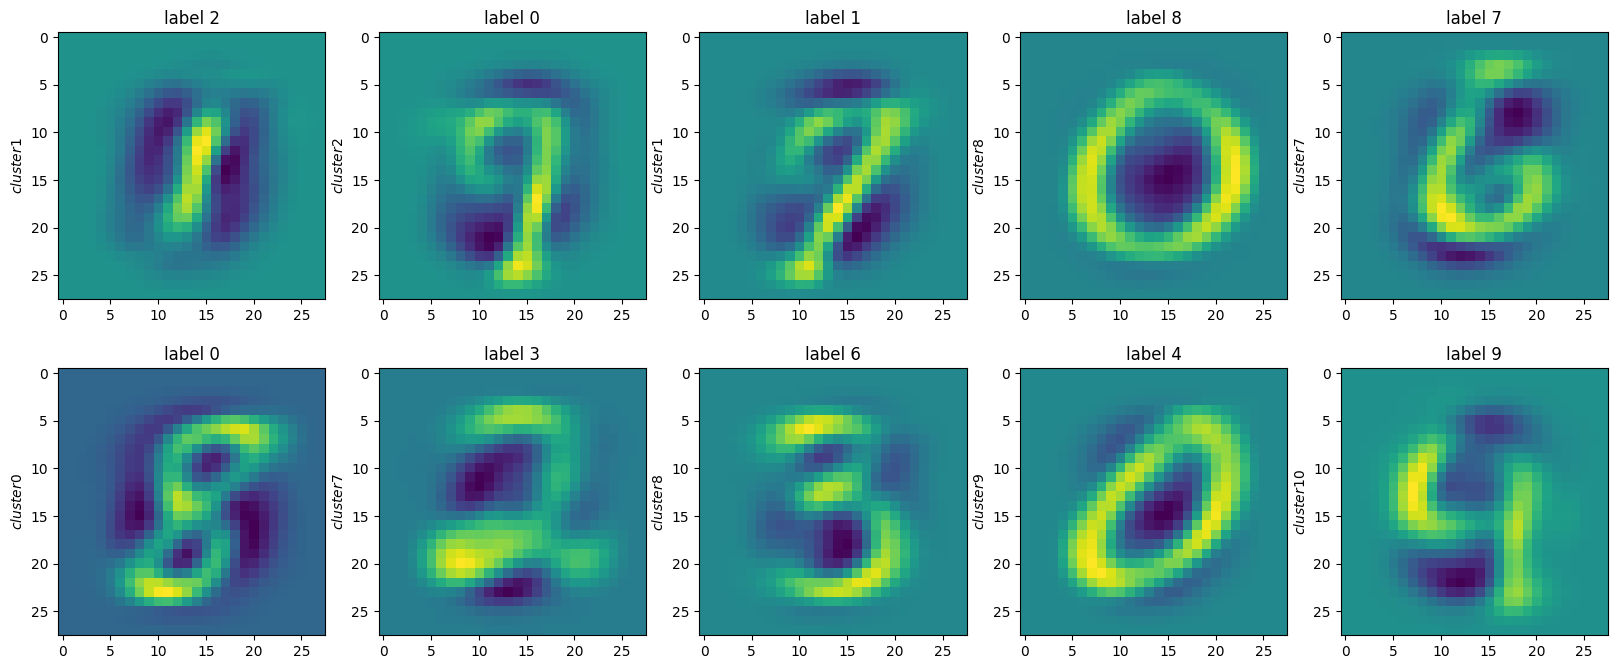

In [21]:
f1, axs1 = plt.subplots(2, 5, figsize=(20,8));

x = mean3[:, 0]
image_example = x.reshape(28, 28)
axs1[0][0].imshow(image_example, cmap=plt.cm.viridis);
axs1[0][0].set_ylabel(r'$cluster 1$');
axs1[0][0].set_title('label 2');

x = mean3[:, 1]
image_example = x.reshape(28, 28)
axs1[0][1].imshow(image_example, cmap=plt.cm.viridis);
axs1[0][1].set_ylabel(r'$cluster 2$');
axs1[0][1].set_title('label 0');

x = mean3[:, 2]
image_example = x.reshape(28, 28)
axs1[0][2].imshow(image_example, cmap=plt.cm.viridis);
axs1[0][2].set_ylabel(r'$cluster 1$');
axs1[0][2].set_title('label 1');

x = mean3[:, 3]
image_example = x.reshape(28, 28)
axs1[0][3].imshow(image_example, cmap=plt.cm.viridis);
axs1[0][3].set_ylabel(r'$cluster 8$');
axs1[0][3].set_title('label 8');


x = mean3[:, 4]
image_example = x.reshape(28, 28)
axs1[0][4].imshow(image_example, cmap=plt.cm.viridis);
axs1[0][4].set_ylabel(r'$cluster 7$');
axs1[0][4].set_title('label 7');

x = mean3[:, 5]
image_example = x.reshape(28, 28)
axs1[1][0].imshow(image_example, cmap=plt.cm.viridis);
axs1[1][0].set_ylabel(r'$cluster 0$');
axs1[1][0].set_title('label 0');


x = mean3[:, 6]
image_example = x.reshape(28, 28)
axs1[1][1].imshow(image_example, cmap=plt.cm.viridis);
axs1[1][1].set_ylabel(r'$cluster 7$');
axs1[1][1].set_title('label 3');

x = mean3[:, 7]
image_example = x.reshape(28, 28)
axs1[1][2].imshow(image_example, cmap=plt.cm.viridis);
axs1[1][2].set_ylabel(r'$cluster 8$');
axs1[1][2].set_title('label 6');

x = mean3[:, 8]
image_example = x.reshape(28, 28)
axs1[1][3].imshow(image_example, cmap=plt.cm.viridis);
axs1[1][3].set_ylabel(r'$cluster 9$');
axs1[1][3].set_title('label 4');

x = mean3[:, 9]
image_example = x.reshape(28, 28)
axs1[1][4].imshow(image_example, cmap=plt.cm.viridis);
axs1[1][4].set_ylabel(r'$cluster 10$');
axs1[1][4].set_title('label 9');

#plt.savefig('fig 52.8.pdf')

**Figure 52.8** The mean image for each cluster, obtained by averaging the images assigned to the cluster. The images are rendered using a blue color scale against a dark background for emphasis. On top of each image, we assign a class label to the cluster. This label is obtained by a majority vote, namely, by determining the digit that is most repeated within the images in the cluster. 

In [22]:
prob_matrix = np.zeros((K, K)) #  each row corresponds to one digit. It shows the fraction of images for that digit that are assigned to k-th cluster

counter_labels = np.zeros((K,))
# classification based on k-means++ initialization
Htest = test_features.T
Gtest = test_labels.T
Ntest = max(test_features.shape)

for nn in range(N_test):
    h = Htest[:, nn]
    d = np.zeros((K,))
    for k in range(K):
        mu = mean3[:, k]
        d[k] = np.linalg.norm(h-mu)**2 # squared distance
        
    idx = np.argsort(d) # sort
    cluster[nn] = idx[0] # test feature h assigned to cluster idx[0]
    prob_matrix[Gtest[nn], idx[0]] = prob_matrix[Gtest[nn], idx[0]] + 1 # count how many times an image with label Gtest(nn) assigned to cluster idx[0]
    
    counter_labels[Gtest[nn]] = counter_labels[Gtest[nn]] + 1 # how many times this label occurred 
    
    

    
for kk in range(K):
    prob_matrix[kk, :] = prob_matrix[kk, :] / counter_labels[kk]
    
a = np.max(prob_matrix, axis = 1)
idx = np.argmax(prob_matrix, axis = 1)

for j in range(10):
    np.fix(a[j]*counter_labels[j])

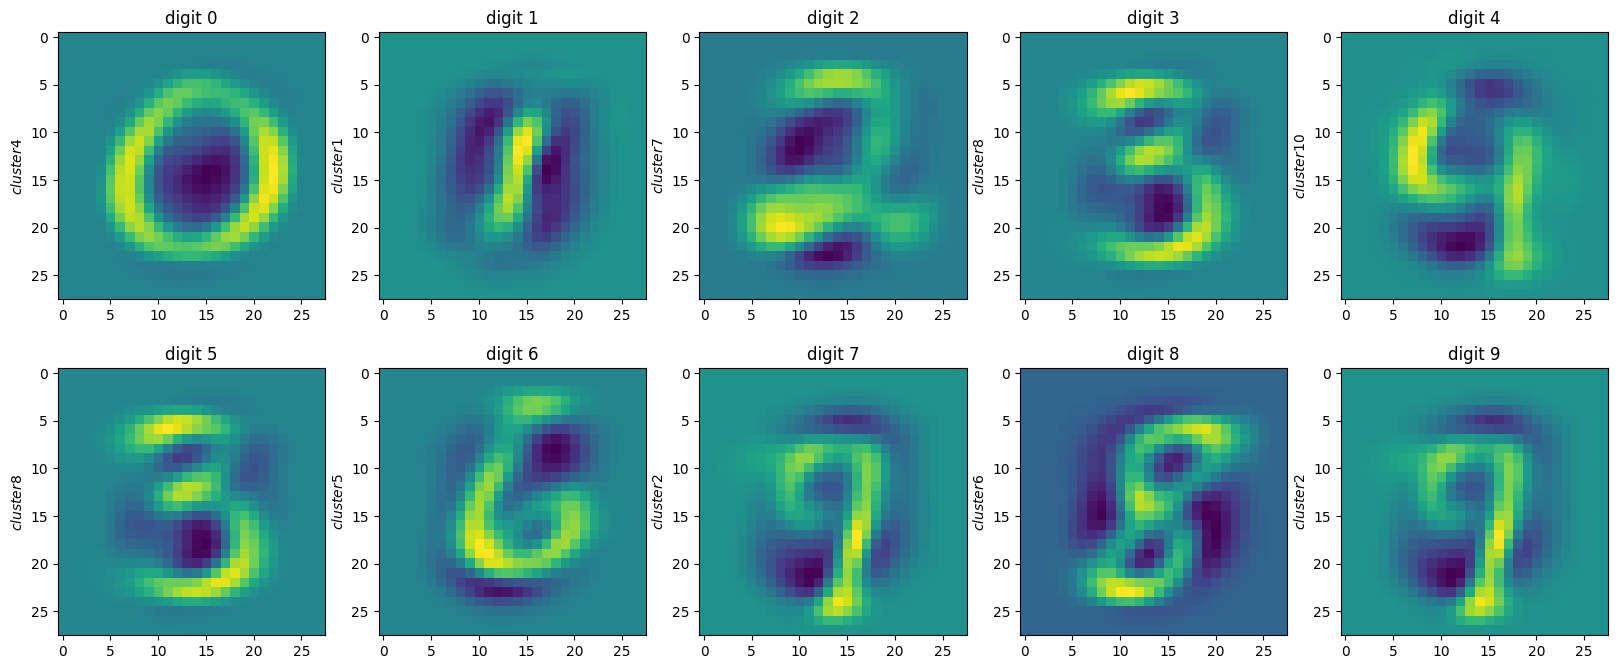

In [23]:
f1, axs1 = plt.subplots(2, 5, figsize=(20,8));

x = mean3[:, idx[0]]
image_example = x.reshape(28, 28)
axs1[0][0].imshow(image_example, cmap=plt.cm.viridis);
axs1[0][0].set_ylabel(f'$cluster {idx[0]+1}$');
axs1[0][0].set_title('digit 0');


x = mean3[:, idx[1]]
image_example = x.reshape(28, 28)
axs1[0][1].imshow(image_example, cmap=plt.cm.viridis);
axs1[0][1].set_ylabel(f'$cluster {idx[1]+1}$');
axs1[0][1].set_title('digit 1');

x = mean3[:, idx[2]]
image_example = x.reshape(28, 28)
axs1[0][2].imshow(image_example, cmap=plt.cm.viridis);
axs1[0][2].set_ylabel(f'$cluster {idx[2]+1}$');
axs1[0][2].set_title('digit 2');


x = mean3[:, idx[3]]
image_example = x.reshape(28, 28)
axs1[0][3].imshow(image_example, cmap=plt.cm.viridis);
axs1[0][3].set_ylabel(f'$cluster {idx[3]+1}$');
axs1[0][3].set_title('digit 3');

x = mean3[:, idx[4]]
image_example = x.reshape(28, 28)
axs1[0][4].imshow(image_example, cmap=plt.cm.viridis);
axs1[0][4].set_ylabel(f'$cluster {idx[4]+1}$');
axs1[0][4].set_title('digit 4');


x = mean3[:, idx[5]]
image_example = x.reshape(28, 28)
axs1[1][0].imshow(image_example, cmap=plt.cm.viridis);
axs1[1][0].set_ylabel(f'$cluster {idx[5]+1}$');
axs1[1][0].set_title('digit 5');

x = mean3[:, idx[6]]
image_example = x.reshape(28, 28)
axs1[1][1].imshow(image_example, cmap=plt.cm.viridis);
axs1[1][1].set_ylabel(f'$cluster {idx[6]+1}$');
axs1[1][1].set_title('digit 6');


x = mean3[:, idx[7]]
image_example = x.reshape(28, 28)
axs1[1][2].imshow(image_example, cmap=plt.cm.viridis);
axs1[1][2].set_ylabel(f'$cluster {idx[7]+1}$');
axs1[1][2].set_title('digit 7');

x = mean3[:, idx[8]]
image_example = x.reshape(28, 28)
axs1[1][3].imshow(image_example, cmap=plt.cm.viridis);
axs1[1][3].set_ylabel(f'$cluster {idx[8]+1}$');
axs1[1][3].set_title('digit 8');

x = mean3[:, idx[9]]
image_example = x.reshape(28, 28)
axs1[1][4].imshow(image_example, cmap=plt.cm.viridis);
axs1[1][4].set_ylabel(f'$cluster {idx[9]+1}$');
axs1[1][4].set_title('digit 9');

plt.savefig('figs/fig 52.9.pdf')

**Figure 52.9** The label on top of each cluster shows the digit label from the testing set that is most often assigned to that cluster.  The images are rendered using the same blue scale as before for emphasis.